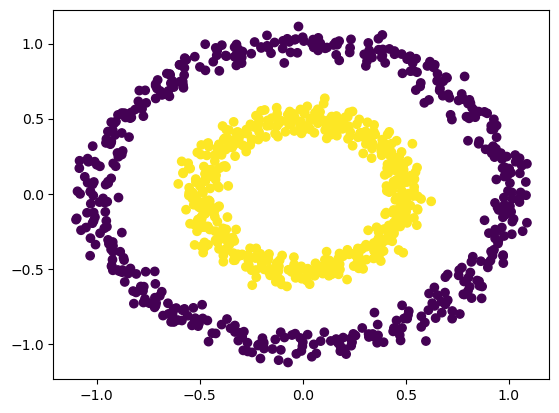

- MSE : 0.00, KL : 10.16


In [5]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
from sklearn import datasets

# ----------------------------------------------------------------------------------

# dataset

#

noisy_circles = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.05)
# print(noisy_circles)
# circles = torch.from_numpy(noisy_circles)

x_data = torch.from_numpy(noisy_circles[0]).to(torch.float32)
y_data = torch.from_numpy(noisy_circles[1]).to(torch.float32)

plt.scatter(x_data.numpy()[:, 0], x_data.numpy()[:, 1], c=y_data.numpy())
plt.show()

# ----------------------------------------------------------------------------------

# model and training

#

model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=2, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=1),
)

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.001

optimizer = optim.Adam(model.parameters(), lr=0.1)

for step in range(2000):
    pre = model(x_data)
    mse = mse_loss(pre[:, 0], y_data)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))



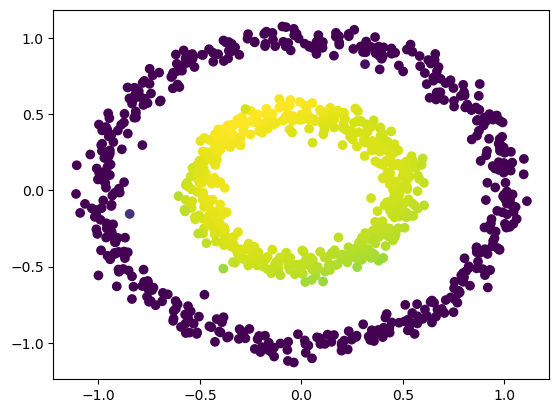

In [6]:
# ----------------------------------------------------------------------------------

# testing

#

test_noisy_circles = datasets.make_circles(n_samples=1000, factor=0.5, noise=0.05)

x_data_test = torch.from_numpy(test_noisy_circles[0]).to(torch.float32)
y_data_test = torch.from_numpy(test_noisy_circles[1]).to(torch.float32)

# ----------------------------------------------------------------------------------

# plot results

#

models_result = np.array([model(x_data_test).data.numpy() for k in range(10000)])
models_result = models_result[:,:,0]    
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

plt.scatter(x_data_test.numpy()[:, 0], x_data_test.numpy()[:, 1], c=mean_values)
plt.show()



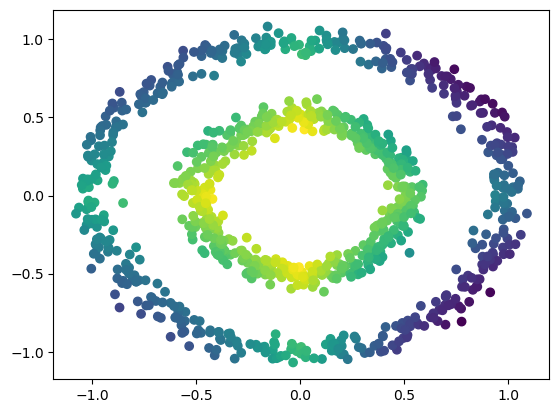

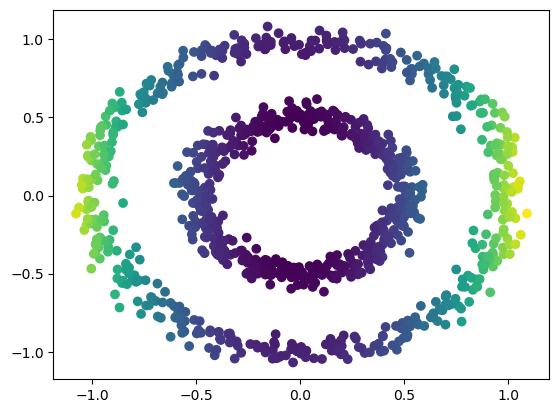

In [3]:
plt.scatter(x_data_test.numpy()[:, 0], x_data_test.numpy()[:, 1], c=np.round(mean_values))
plt.show()

plt.scatter(x_data_test.numpy()[:, 0], x_data_test.numpy()[:, 1], c=std_values)
plt.show()

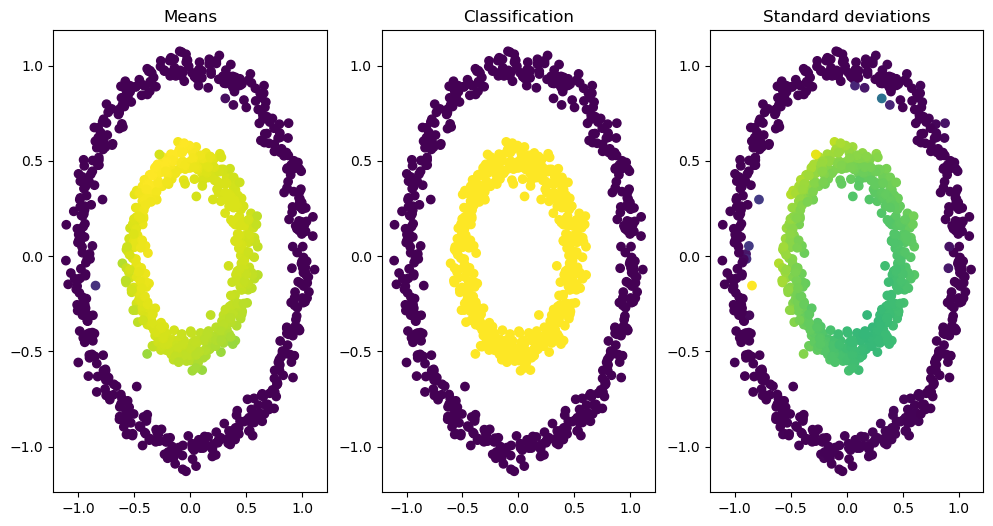

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].scatter(x_data_test.numpy()[:, 0], x_data_test.numpy()[:, 1], c=mean_values)
axs[0].set_title('Means')

axs[1].scatter(x_data_test.numpy()[:, 0], x_data_test.numpy()[:, 1], c=np.round(mean_values))
axs[1].set_title('Classification')

axs[2].scatter(x_data_test.numpy()[:, 0], x_data_test.numpy()[:, 1], c=std_values)
axs[2].set_title('Standard deviations')
plt.show()

In [7]:
for item, name in model.named_parameters():

    print(item)

0.weight_mu
0.weight_log_sigma
0.bias_mu
0.bias_log_sigma
2.weight_mu
2.weight_log_sigma
2.bias_mu
2.bias_log_sigma
4.weight_mu
4.weight_log_sigma
4.bias_mu
4.bias_log_sigma
